# Language detection using language models

The goal of this task is to implement a detector of the English language using language models. You will compute the perplexity of an investigated text given the English language model and decide whether the text is written in English based on a perplexity threshold.

## Create an English language model

Load English Wikipedia texts from ‘../data/corpora/enlang1.txt’ and create an English bigram model – ie. Compute unigram histograms, bigram histograms and the size of vocabulary (number of unique characters).

Experiment with different language models, e.g. a trigram model.

In [1]:
with open('../data/corpora/enlang1.txt') as fin:
    print(fin.readlines()[0][:200])

the punjabi suba movement aimed at creation of punjabi majority subah province in the erstwhile east punjab state of india in the led by the akali dal it resulted in the formation of the punjabi major


In [2]:
V = 0 #size of vocabulary
histogram = {} #unigram and bigram frequencies

with open('../data/corpora/enlang1.txt') as fin:
    for doc in fin.readlines():
        for i in range(len(doc)-2):
            bigram = doc[i:i+2]
            unigram = doc[i]
            histogram[bigram] = histogram.get(bigram, 0) + 1
            histogram[unigram] = histogram.get(unigram, 0) + 1
    V = len([unigram for unigram in histogram.keys() if len(unigram) == 1])

In [3]:
print(V)
print(histogram['en'])
print(histogram['e'])

2147
261288
2985706


## Define the function for computing perplexity. 

The function should take a string as a parameter and return its perplexity based on the language model from above. Use the Laplace smoothing for probability estimation.

In [4]:
import numpy as np

#Compute the probability of a bigram using the Laplace smoothing
def getProbability(bigram):
    return 1.0*(histogram.get(bigram, 0) + 1) / \
                (histogram.get(bigram[0], 0) + V)

# Get the perplexity of text.
def getPerplexity(text):
    bigrams = [text[i:i+2] for i in range(len(text) - 1)]
    h = -sum(map(lambda x: np.log2(getProbability(x)), bigrams))
    return np.power(2, h/len(bigrams))

## Compute perplexities

Compute perplexities of various text corpora from Wikipedia.

In [5]:
PATH = '../data/corpora/'

languages = {'en': {'file': 'enlang2.txt'},
             'cs': {'file': 'cslang.txt'},
             'es': {'file': 'eslang.txt'},
             'fr': {'file': 'frlang.txt'},
             'it': {'file': 'itlang.txt'},
             'ru': {'file': 'rulang.txt'},
             'mixed': {'file': 'mixedlang.txt'}
            }

for lang, v in languages.items():
    with open(PATH + v['file']) as fin:
        perplexities = []
        for doc in fin.readlines():
            doc = doc.strip()
            perplexities.append(getPerplexity(doc))
        languages[lang]['perplexities'] = perplexities

## Plot histograms

Plot perplexity histograms of the English and mixed corpora. Decide what the best threshold for detecting the English language is. Visualize perplexities of the other corpora. 

Mean and standard deviation of the first dataset: mean=11.753307865867724, std=1.72161488333111.
Mean and standard deviation of the second dataset: mean=59.289656125276466, std=74.5412767081915.


<IPython.core.display.Javascript object>


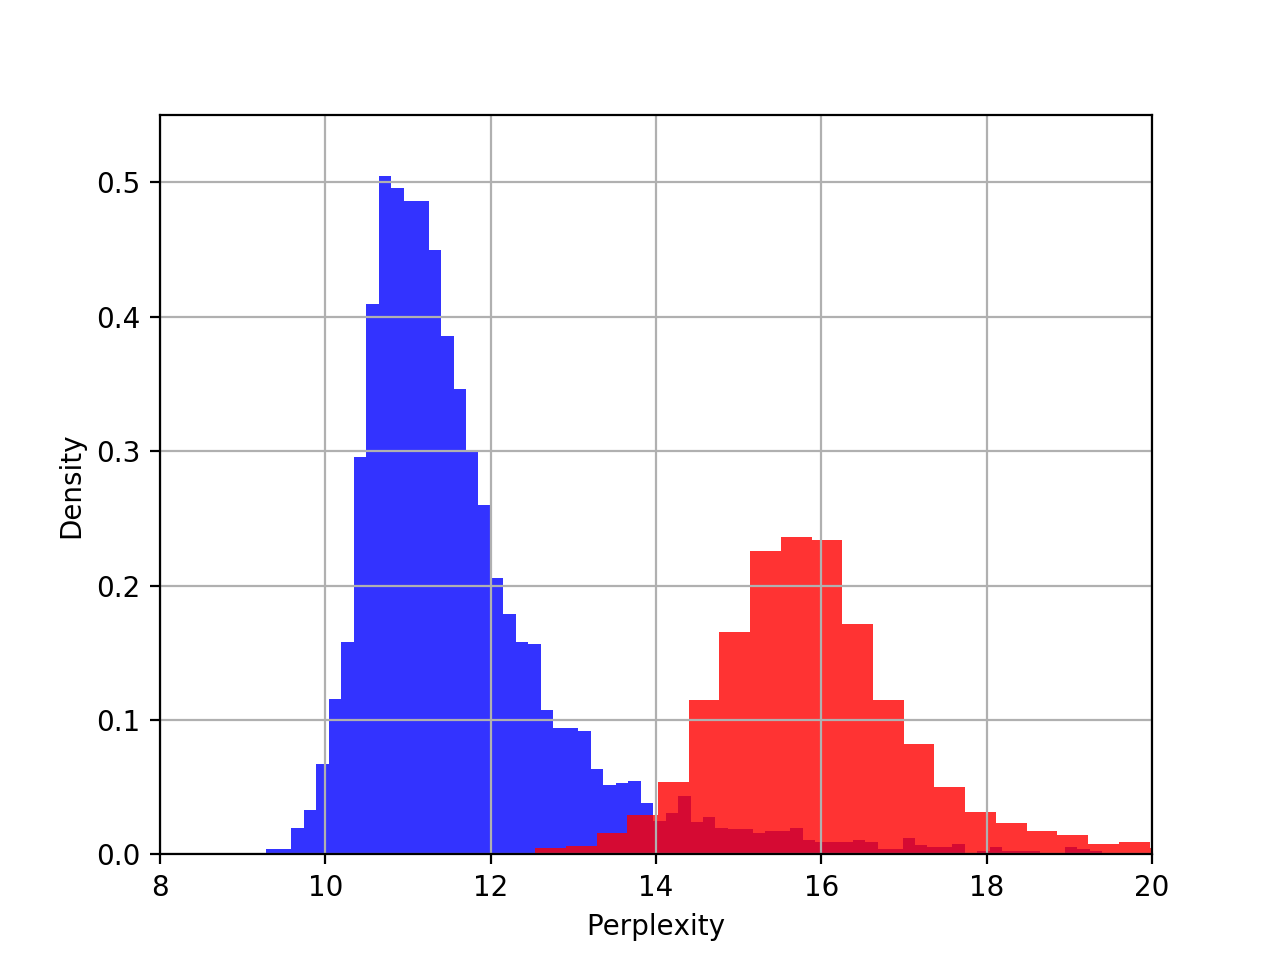

In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt

x1 = languages['en']['perplexities']
x2 = languages['mixed']['perplexities']

mu1 = np.mean(x1)
sigma1 = np.std(x1)
print("Mean and standard deviation of the first dataset: mean={}, std={}.".format(mu1, sigma1))

mu2 = np.mean(x2)
sigma2 = np.std(x2)
print("Mean and standard deviation of the second dataset: mean={}, std={}.".format(mu2, sigma2))

# histograms of perplexities
plt.hist(x1, bins='auto', normed=1, facecolor='blue', alpha=0.8)
plt.hist(x2, bins=1000, normed=1, facecolor='red', alpha=0.8)

plt.xlabel('Perplexity')
plt.ylabel('Density')
plt.axis([8, 20, 0, 0.55])
plt.grid(True)

plt.show()

## Language detector

Implement and test the ‘detectLang’ function, which takes a string as the input and returns true if the string is written in English. It returns False otherwise.

In [7]:
def detectLang(text, threshold=14):
    text = text.lower() #The training corpus was also in the lowercase form.
    if len(text) <= 1:
        return False
    else:
        return True if getPerplexity(text) <= threshold else False

In [8]:
print(detectLang('This is an example of the english language.'))
print(detectLang('Another text written in the target language which should pass.'))
print(detectLang('Toto je ukázkový český text.'))
print(detectLang('Následuje alternativní posloupnost znaků.'))

True
True
False
False
